In [152]:
%matplotlib notebook
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

# Import data: the number of daily female births in California in 1959. 
# There are 365 observations. The source of the dataset is credited to Newton (1988).
data = pd.read_csv('data/daily-total-female-births.csv',index_col=0)
# Set frequency of date index
data.index = pd.DatetimeIndex(data.index,freq='infer')
print(data.index.freq)
data.head()

<Day>


,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


<IPython.core.display.Javascript object>


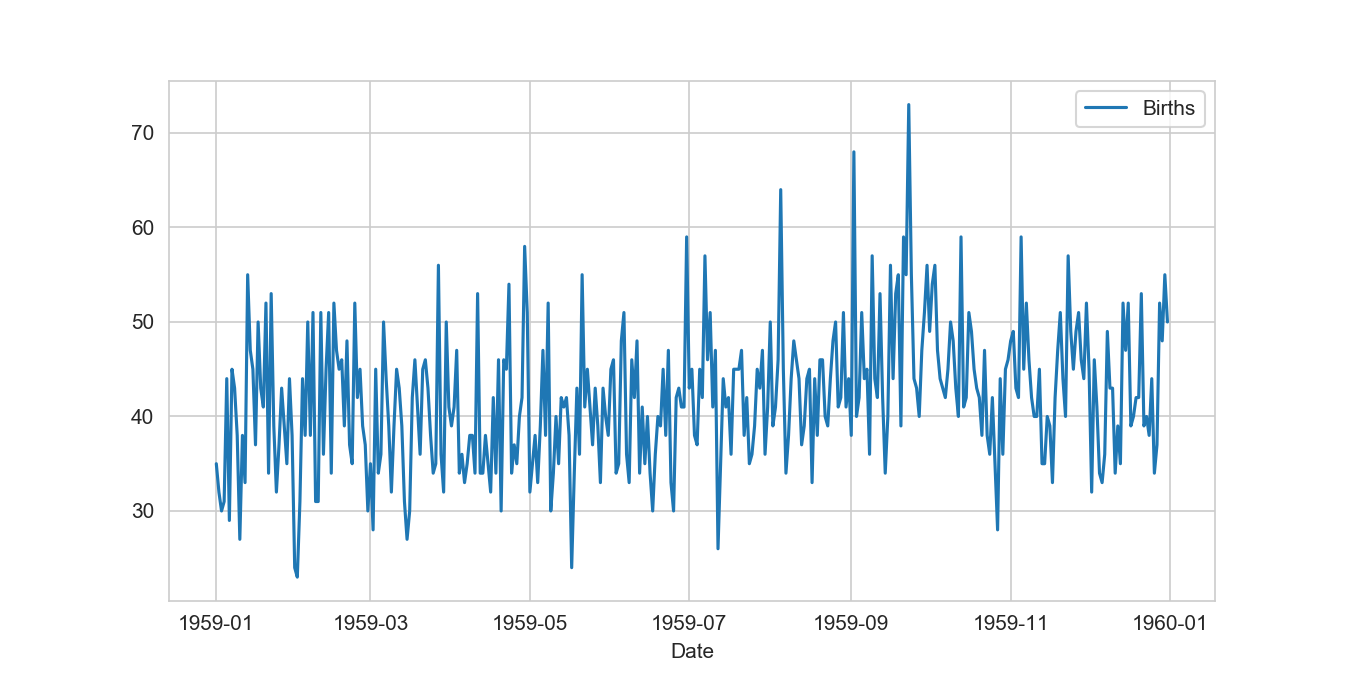

<IPython.core.display.Javascript object>


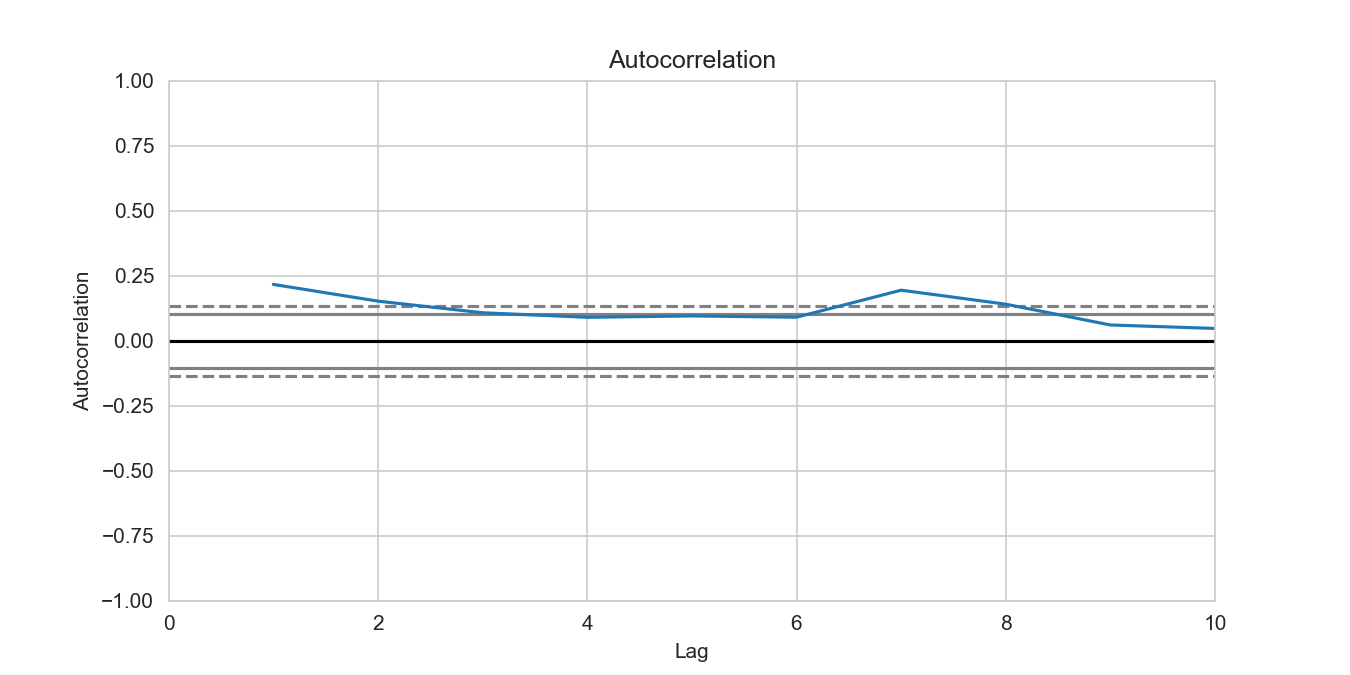

(0, 10)

In [153]:
# Plot data
plt.figure(figsize=(9,4.5))
sns.set_style("whitegrid")
sns.lineplot(data=data)

plt.figure(figsize=(9,4.5))
# Compute and plot autocorrelation
autocorrelation_plot(data)
plt.grid()
plt.title('Autocorrelation')
plt.xlim([0,10])

                             ARIMA Model Results                              
Dep. Variable:               D.Births   No. Observations:                  364
Model:                 ARIMA(2, 1, 0)   Log Likelihood               -1264.077
Method:                       css-mle   S.D. of innovations              7.793
Date:                Wed, 26 Jun 2019   AIC                           2536.154
Time:                        17:20:12   BIC                           2551.742
Sample:                    01-02-1959   HQIC                          2542.349
                         - 12-31-1959                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0496      0.218      0.228      0.820      -0.377       0.476
ar.L1.D.Births    -0.5942      0.050    -11.845      0.000      -0.693      -0.496
ar.L2.D.Births    -0.2856      0.050

<IPython.core.display.Javascript object>


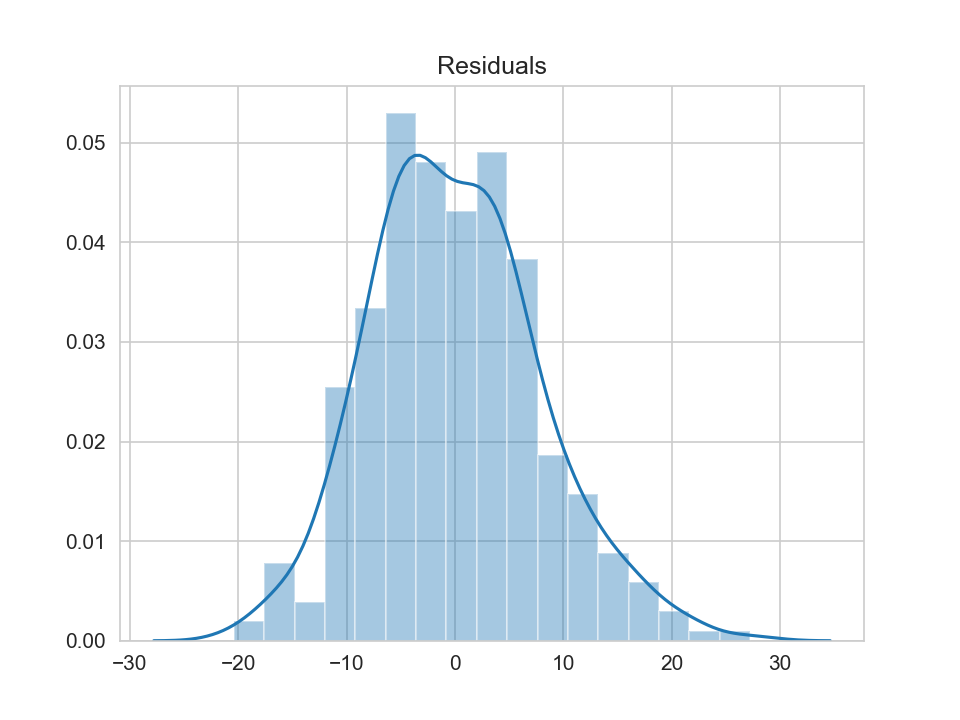

,0
count,364.000000
mean,-0.007873
std,7.804431
min,-20.383962
25%,-5.409250
50%,-0.574060
75%,4.829771
max,27.198210


In [155]:
# Analyze with ARIMA model
arima=(2,1,0)
model = ARIMA(data, order=arima)
model_fit = model.fit(disp=0)
print(model_fit.summary())

plt.figure()
sns.distplot(model_fit.resid)
plt.title('Residuals')
pd.DataFrame(model_fit.resid).describe()

In [156]:
# Validate model with 80-20 split
X = data.values
trainFraction=0.8
trainSize = int(len(X) * trainFraction)
train, test = X[0:trainSize], X[trainSize:len(X)]
predictions = []
for t in range(len(test)):
    model = ARIMA(train, order=arima)
    fitResults = model.fit(disp=0)
    output = fitResults.forecast(steps=t+1)
    yhat = output[0][t]
    predictions.append(yhat)
    obs = test[t]
    #history.append(obs)
    if (t%10==0):
        print('%d: predicted=%f, expected=%f' % (t,yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

0: predicted=45.426045, expected=42.000000
10: predicted=45.001055, expected=45.000000
20: predicted=45.391091, expected=42.000000
30: predicted=45.779920, expected=47.000000
40: predicted=46.168750, expected=44.000000
50: predicted=46.557580, expected=43.000000
60: predicted=46.946411, expected=42.000000
70: predicted=47.335241, expected=48.000000
Test MSE: 49.845


<bound method DecomposeResult.plot of <statsmodels.tsa.seasonal.DecomposeResult object at 0x000001F8A7A73438>>


<IPython.core.display.Javascript object>


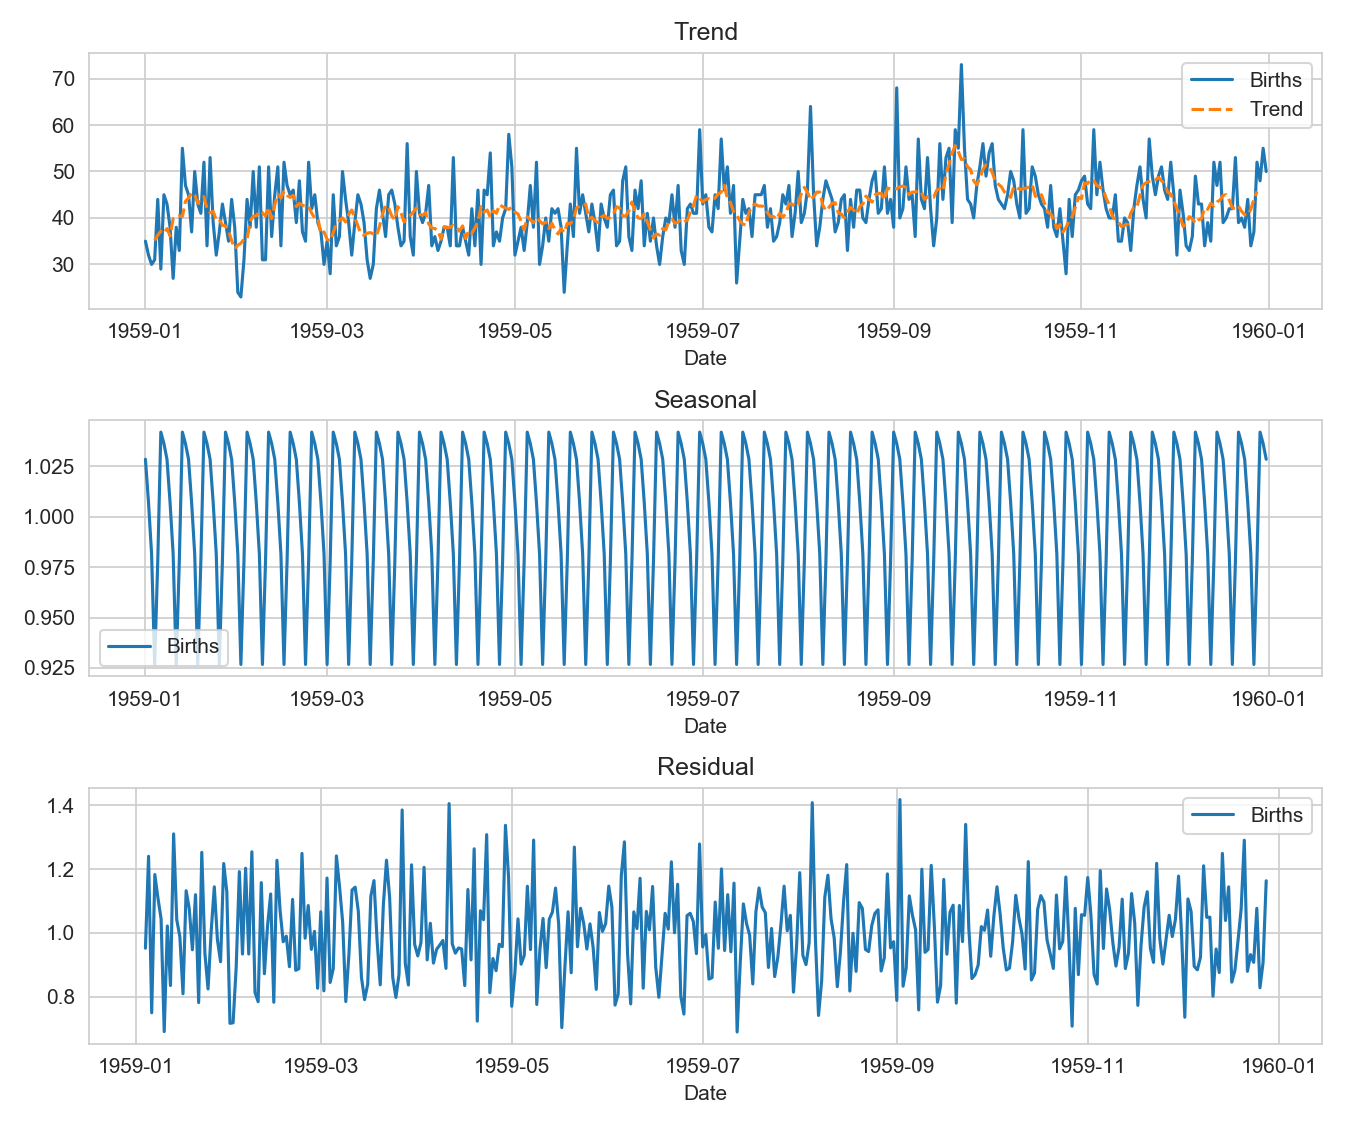

In [157]:
# Seasonal decomposition
result = seasonal_decompose(data, model='multiplicative')
print(result.plot)

# Plot results
numRow=3
numCol=1

plt.figure(figsize=(numCol*9,numRow*2.5))
titles=['Trend','Seasonal','Residual']
attributes=['trend','seasonal','resid']
sns.set_style("whitegrid")
plotData=data.copy()
plotData['Trend']=getattr(result,'trend')

for i in range(len(attributes)):
    plt.subplot(numRow,numCol,i+1)
    if (i==0):    
        sns.lineplot(data=plotData)
    else:
        sns.lineplot(data=getattr(result,attributes[i]))
    plt.title(titles[i])
    
# Make the figure fit
plt.tight_layout()